In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from calendar import monthrange
from statsmodels.tsa.seasonal import seasonal_decompose

In [9]:
births = pd.read_csv(r"C:\Users\SHREYANSH SANKLECHA/notebooks/notebooks/Births.csv")
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [10]:
births.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [11]:
births.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [12]:
# forward filling days replacing nan values.
births = births.ffill()

In [13]:
births["day"] = births["day"].map(int)

In [14]:
births["day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 99],
      dtype=int64)

### Replacing the wrong day with correct day val and converting into datetime.

In [15]:
# Way I
corrected_datecol=[]
for i in range(len(births)):
    try:
        year = births['year'][i]
        month = births['month'][i]
        day = min(births['day'][i], monthrange(year, month)[1])  # Ensure day is within valid range
        corrected_date = datetime(year=year, month=month, day=day)
        corrected_datecol.append(corrected_date.strftime('%Y-%m-%d'))
    except ValueError:
        print(None)
births["corrected_dates"]= corrected_datecol

In [16]:
births['corrected_dates'] = pd.to_datetime(births['corrected_dates'])

In [17]:
births

,year,month,day,gender,births,corrected_dates
0,1969,1,1,F,4046,1969-01-01
1,1969,1,1,M,4440,1969-01-01
2,1969,1,2,F,4454,1969-01-02
3,1969,1,2,M,4548,1969-01-02
4,1969,1,3,F,4548,1969-01-03
...,...,...,...,...,...,...
15542,2008,10,31,M,183219,2008-10-31
15543,2008,11,31,F,158939,2008-11-30
15544,2008,11,31,M,165468,2008-11-30
15545,2008,12,31,F,173215,2008-12-31


### EDA

In [18]:
births["decade"] = 10*(births["year"]//10)

(0.0, 16000.0)

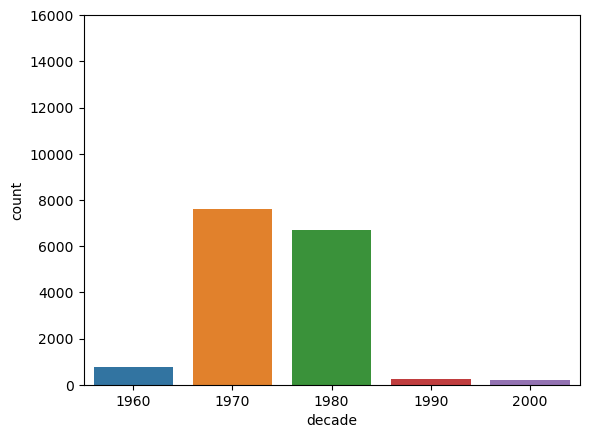

In [19]:
sns.countplot(x='decade',data=births)
plt.ylim(0,16000)
# more data of decade 1970 and 1980

**So below we have created a graph comparing the birth rates b/w male and female with rispect to year and month.**

- **Function pivot_table** takes 4 basic arguments:
  - data.pivot_table(col data, index, column, aggfunc)
- It creates a table from the the given data(using unique values) using the given index and column returning the aggfunc mentioned 

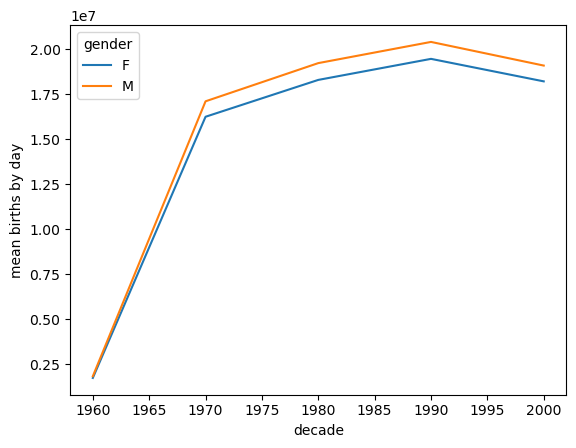

In [20]:
births.pivot_table('births', index='decade',
                    columns='gender', aggfunc='sum').plot()
# plt.ylim(8000,12000)
plt.ylabel('mean births by day');
plt.show()

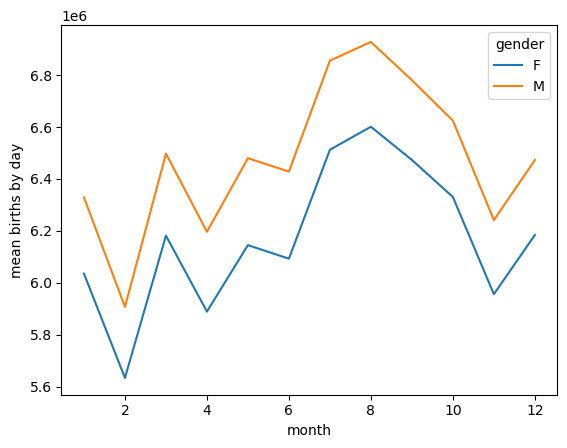

In [21]:
births.pivot_table('births', index='month',
                    columns='gender', aggfunc='sum').plot()
# plt.ylim(8000,12000)
plt.ylabel('mean births by day');
plt.show()

In [22]:
births = births.drop("decade",axis = 1)

Note that the 1990s and 2000s are missing because the data contains only the month of birth starting in 1989 it does not have days data.

**Time series decomposition.**

In [23]:
# Perform decomposition
result = seasonal_decompose(births['births'], model='multiplicative', period=12)

In [24]:
births1 = births
births1.index = births1["corrected_dates"]

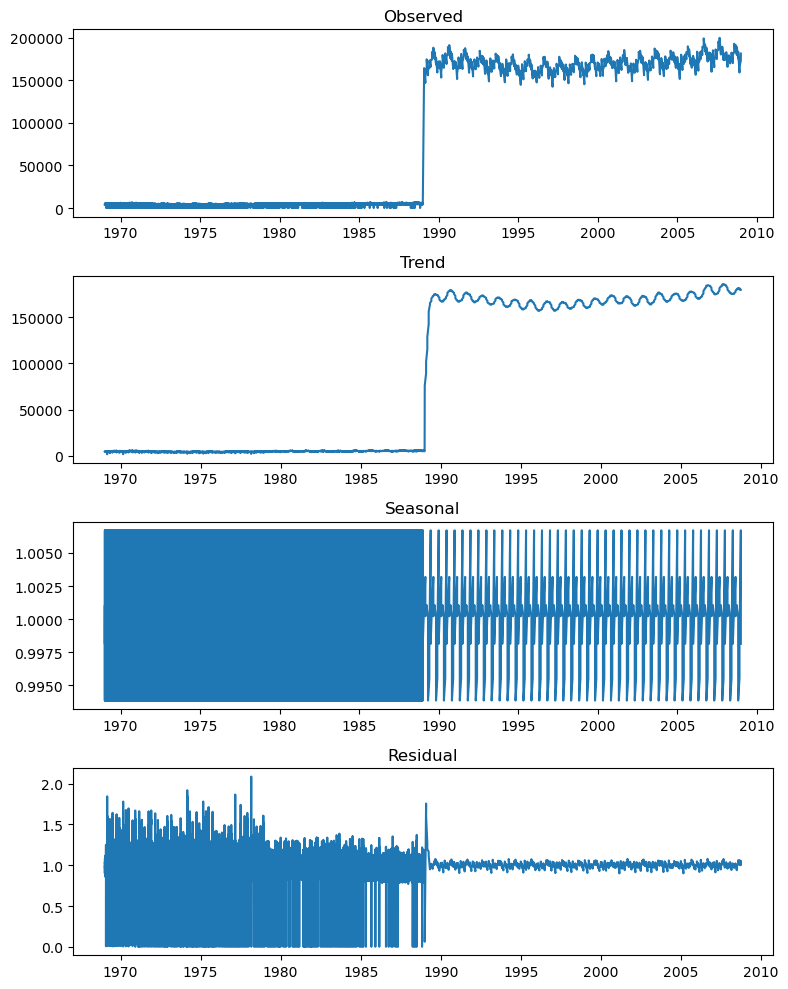

In [25]:
import matplotlib.pyplot as plt

# Plot decomposition components
plt.figure(figsize=(8, 10))

plt.subplot(4, 1, 1)
plt.plot(births1.index, result.observed)
plt.title('Observed')

plt.subplot(4, 1, 2)
plt.plot(births1.index, result.trend)
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(births1.index, result.seasonal)
plt.title('Seasonal')

plt.subplot(4, 1, 4)
plt.plot(births1.index, result.resid)
plt.title('Residual')

plt.tight_layout()
plt.show()


In [26]:
births = births.drop("corrected_dates",axis = 1)

## BALANCING DATA USING LOGARITHMIC TRANSFORMATION

In [27]:
births['births']=np.log(births['births'])

In [28]:
births.head(10)

,year,month,day,gender,births
corrected_dates,,,,,
1969-01-01,1969,1,1,F,8.305484
1969-01-01,1969,1,1,M,8.398410
1969-01-02,1969,1,2,F,8.401558
1969-01-02,1969,1,2,M,8.422443
1969-01-03,1969,1,3,F,8.422443
1969-01-03,1969,1,3,M,8.515992
1969-01-04,1969,1,4,F,8.398410
1969-01-04,1969,1,4,M,8.416267
1969-01-05,1969,1,5,F,8.340933


In [29]:
births['births'].describe()

count    15547.000000
mean         8.390422
std          1.312937
min          0.000000
25%          8.379769
50%          8.479284
75%          8.573479
max         12.204181
Name: births, dtype: float64

## ENCODING USING LABEL ENCODING:

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
births['gender']=le.fit_transform(births['gender'].values)

In [31]:
births

,year,month,day,gender,births
corrected_dates,,,,,
1969-01-01,1969,1,1,0,8.305484
1969-01-01,1969,1,1,1,8.398410
1969-01-02,1969,1,2,0,8.401558
1969-01-02,1969,1,2,1,8.422443
1969-01-03,1969,1,3,0,8.422443
...,...,...,...,...,...
2008-10-31,2008,10,31,1,12.118437
2008-11-30,2008,11,31,0,11.976276
2008-11-30,2008,11,31,1,12.016533


## CHECK CORR() USING HEATMAP

<AxesSubplot:>

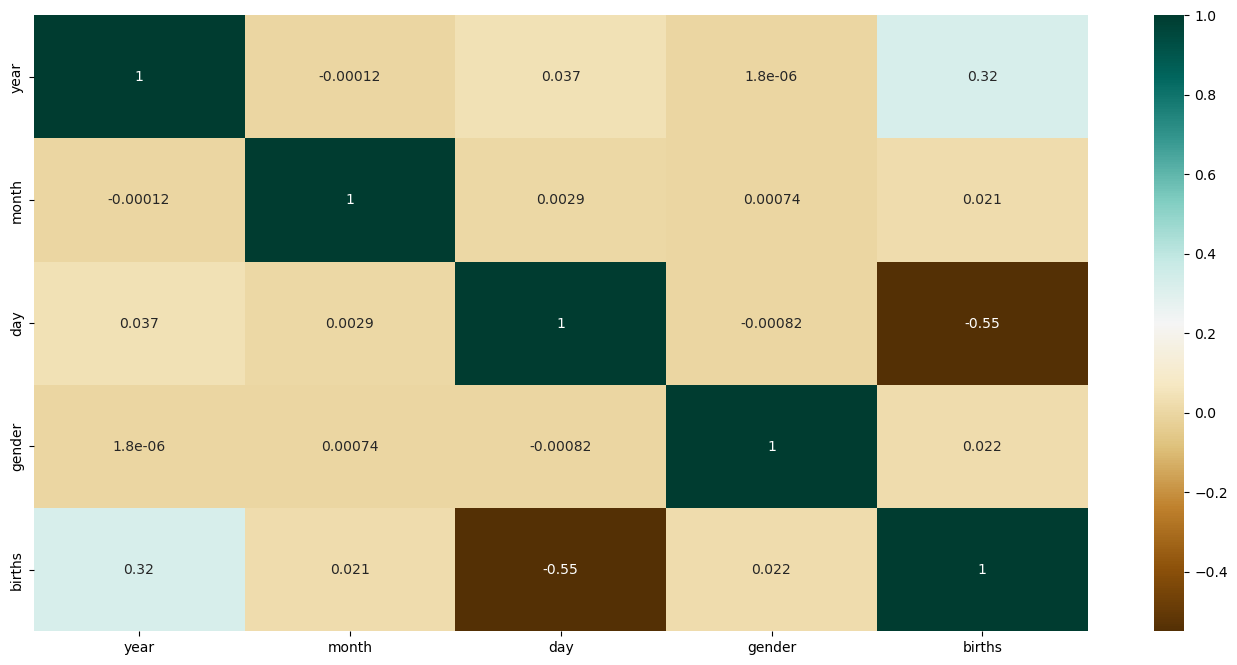

In [32]:
plt.figure(figsize=(17,8))
c= births.corr()
sns.heatmap(c,cmap="BrBG",annot=True)

## TRAIN TEST SPLIT

In [33]:
x=births.drop(columns=["births"],axis=1)
y=births["births"]

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

## DATA SCALING

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [36]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [38]:
lr.fit(x_train,y_train)

LinearRegression()

In [39]:
pred_lor = lr.predict(x_test)

In [40]:
from sklearn.metrics import mean_absolute_error

# Assuming 'y_test' contains the actual target values and 'pred_lor' contains your predicted values
mae = mean_absolute_error(y_test, pred_lor)
print("Mean Absolute Error:", mae*100)

Mean Absolute Error: 60.61365690186743


In [41]:
### Pickling
import pickle

In [42]:
file_name = "lr_model.pkl"

In [43]:
pickle.dump(lr,open(file_name,"wb"))

In [44]:
pickle_model = pickle.load(open(file_name,"rb"))

In [47]:
pred = pickle_model.predict(x_test)

In [49]:
mean_absolute_error(y_test,pred)*100

60.61365690186743